# Project 2 (Cointegration, ARCH and GARCH)
## Name: Lixia

# Question 1  

In this question, we use the Engle-Granger approach to test cointegration.

(a) Load spot and futures prices from data1.csv. Define $s_t = log(spot_t)$ and $f_t = log(futures_t)$. Test whether $s_{t}$ and $f_{t}$ have unit roots using Augmented Dicky-Fuller Test at the $5\%$ significance level. 

(b) Run the following linear regression: $$s_{t}= \gamma_{0}+\gamma_{1}f_{t}+z_{t}$$ 

where $z_t$ is the error term. What are estimated values of $\gamma_{0}$ and $\gamma_{1}$?

(c) Get residuals $\hat z_{t}$. Plot $\hat z_{t}$.

(d) Test whether $\hat z_{t}$ has unit roots or not using Augmented Dicky-Fuller Test at the $5\%$ significance level.

(e) Based on (d), Are $s_t$ and $f_t$ cointegrated?

(f) Run the following linear regression: $$\Delta s_{t} = \beta_{0}+\beta_{1}\Delta f_{t}+\alpha \hat z_{t-1}+v_{t}$$

where $v_{t}$ is the error term.
What is the estimated value of $\alpha$? Is it significant? What is the meaning?  

In [4]:
# load the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.tsa.arima_model import ARIMA

from arch import arch_model
from sklearn.metrics import mean_squared_error

## Solutions

(a)

In [5]:
df = pd.read_csv('data1.csv', parse_dates=['date'], index_col='date')  
n = len(df)                  
spot = df['spot']
s = np.log(spot)  
futures = df['futures']
f = np.log(futures)    

In [6]:
result_spot = adfuller(s)    
print('ADF Statistic: %f' % result_spot[0])
print('p-value: %f' % result_spot[1])
print('Critical Values:')
for key, value in result_spot[4].items():
    print('\t%s: %.3f' % (key,value))

ADF Statistic: -0.310632
p-value: 0.923985
Critical Values:
	1%: -3.542
	5%: -2.910
	10%: -2.593


In [7]:
result_futures = adfuller(f)
print('ADF Statistic: %f' % result_futures[0])
print('p-value: %f' % result_futures[1])
print('Critical Values:')
for key, value in result_futures[4].items():
    print('\t%s: %.3f' % (key,value))

ADF Statistic: 0.188654
p-value: 0.971618
Critical Values:
	1%: -3.535
	5%: -2.907
	10%: -2.591


The two variables are not stationary.They have unit roots.

(b)

In [8]:
X = f  
X = sm.add_constant(X) 
Y = s         
X = X[0:n]    
Y = Y[0:n]   


model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   spot   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     1503.
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           3.64e-46
Time:                        16:15:46   Log-Likelihood:                 134.70
No. Observations:                  66   AIC:                            -265.4
Df Residuals:                      64   BIC:                            -261.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1144      0.179      0.640      0.5

𝛾0 is 0.1144；𝛾1 is 0.9838. 

(c)

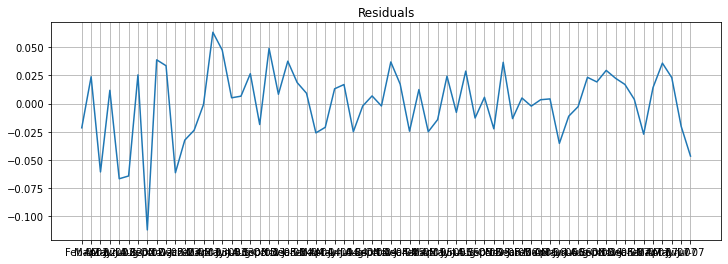

In [9]:
z = results.resid 
plt.figure(figsize=(12,4))
plt.title("Residuals")
plt.plot(z)
plt.grid(True)
plt.show()

(d)

In [10]:
result_z = adfuller(z)    
print('ADF Statistic: %f' % result_z[0])
print('p-value: %f' % result_z[1])
print('Critical Values:')
for key, value in result_z[4].items():
    print('\t%s: %.3f' % (key,value))

ADF Statistic: -4.514650
p-value: 0.000185
Critical Values:
	1%: -3.555
	5%: -2.916
	10%: -2.596


The z is stationary. It doesn't have a unit root.

(e)

$s_t$ and $f_t$ cointegrated.

(f)

In [11]:
s_diff = s.diff(1)  
f_diff = f.diff(1)

In [12]:
lag_z = z.shift(1)  
X = pd.concat([f_diff, lag_z], axis=1) 

X = sm.add_constant(X) 
Y = s_diff         
X = X[1:n]    
Y = Y[1:n]   

model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   spot   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     9.831
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           0.000196
Time:                        16:15:48   Log-Likelihood:                 134.34
No. Observations:                  65   AIC:                            -262.7
Df Residuals:                      62   BIC:                            -256.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0027      0.004     -0.638      0.5

𝛼 is -1.8004. It is significant since p < 0.05.The error of the original model is large. We need to use the error correction model. 

# Question 2 

We use the following three different models in this question.

Model A: ARMA(2,2)  

Model B: AR(2)-ARCH(2)   

Model C: AR(1)-GARCH(1,1)  
    

(a) Load the time series saved in 'qt.csv' file.  Plot qt. 

(b) Separate the data set into two parts: training data are from 1-390 and testing data are from 391-400. Create a variable "qt_train" for training data and another variable "qt_test" for testing data. 

(c) For each model, estimate the model with training data and forecast the last ten observations of qt. 

(d) For each model, compute the mean squared error (MSE) for the forecasted qt. 

(e) Which model has the lowest MSE? Explain your findings.

(a)

In [13]:
# load the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt
import statsmodels.api as sm

from arch import arch_model

In [14]:
df = pd.read_csv('qt.csv',header=None)
n = len(df)
qt=df

(b)

In [15]:
qt_train=qt[0:390]
qt_test=qt[390:400]

(c)

In [16]:
p =2
model = ARIMA(qt_train, order=(p,0,2))
model_fit = model.fit(method='css')
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      0   No. Observations:                  390
Model:                     ARMA(2, 2)   Log Likelihood                -806.593
Method:                           css   S.D. of innovations              1.935
Date:                Thu, 24 Nov 2022   AIC                           1625.186
Time:                        16:15:48   BIC                           1648.952
Sample:                             2   HQIC                          1634.609
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0322      0.300     -3.445      0.001      -1.619      -0.445
ar.L1.0        1.0531      0.211      4.992      0.000       0.640       1.467
ar.L2.0       -0.4028      0.136     -2.969      0.0

In [17]:
m=10
qt1_forecasted = model_fit.predict(start=390, end=399)
qt1_forecasted

390   -1.482496
391   -1.128747
392   -0.952497
393   -0.909367
394   -0.934936
395   -0.979234
396   -1.015587
397   -1.036027
398   -1.042912
399   -1.041929
dtype: float64

In [18]:
model = arch_model(qt_train, mean='AR',lags=2, vol='GARCH', p=2, q=0)
model_fit = model.fit()
print(model_fit.summary())

Iteration:      1,   Func. Count:      8,   Neg. LLF: 4166.036097279589
Iteration:      2,   Func. Count:     18,   Neg. LLF: 16743.387410210555
Iteration:      3,   Func. Count:     28,   Neg. LLF: 1770.1926142348295
Iteration:      4,   Func. Count:     37,   Neg. LLF: 799.7364295495416
Iteration:      5,   Func. Count:     45,   Neg. LLF: 2185.3581015088066
Iteration:      6,   Func. Count:     53,   Neg. LLF: 249937.6972678994
Iteration:      7,   Func. Count:     61,   Neg. LLF: 1976.351281315782
Iteration:      8,   Func. Count:     69,   Neg. LLF: 920.1705530618996
Iteration:      9,   Func. Count:     77,   Neg. LLF: 728.6773832775066
Iteration:     10,   Func. Count:     85,   Neg. LLF: 727.5758751324136
Iteration:     11,   Func. Count:     92,   Neg. LLF: 727.5384719052489
Iteration:     12,   Func. Count:     99,   Neg. LLF: 727.5339950222201
Iteration:     13,   Func. Count:    106,   Neg. LLF: 727.5324949410303
Iteration:     14,   Func. Count:    113,   Neg. LLF: 727.532

In [19]:
model_fit_forecast = model_fit.forecast(horizon=m)
forecasted2_values = model_fit_forecast.mean.values[-1, :]
forecasted2_values

array([-1.41768129, -0.91698532, -0.6054575 , -0.44285299, -0.37258801,
       -0.35037116, -0.34883374, -0.35377882, -0.35912088, -0.36296898])

In [20]:
model = arch_model(qt_train, mean='AR',lags=1, vol='GARCH', p=1, q=1)
model_fit = model.fit()
print(model_fit.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: 180826917423.46375
Iteration:      2,   Func. Count:     16,   Neg. LLF: 16753495519.94239
Iteration:      3,   Func. Count:     24,   Neg. LLF: 257991411.91798487
Iteration:      4,   Func. Count:     31,   Neg. LLF: 1070.9327971758994
Iteration:      5,   Func. Count:     38,   Neg. LLF: 787.1006090981979
Iteration:      6,   Func. Count:     46,   Neg. LLF: 762.1284819635171
Iteration:      7,   Func. Count:     53,   Neg. LLF: 758.3133063348622
Iteration:      8,   Func. Count:     60,   Neg. LLF: 745.5038684059059
Iteration:      9,   Func. Count:     66,   Neg. LLF: 744.7519733241363
Iteration:     10,   Func. Count:     72,   Neg. LLF: 744.4718735796484
Iteration:     11,   Func. Count:     78,   Neg. LLF: 744.3152885878658
Iteration:     12,   Func. Count:     84,   Neg. LLF: 744.3083252238761
Iteration:     13,   Func. Count:     90,   Neg. LLF: 744.3082042147784
Iteration:     14,   Func. Count:     96,   Neg. LLF: 744.308

In [21]:
model_fit_forecast = model_fit.forecast(horizon=m)
forecasted3_values = model_fit_forecast.mean.values[-1, :]
forecasted3_values

array([-1.59305301, -1.25015412, -0.99283838, -0.79974534, -0.65484585,
       -0.5461114 , -0.46451568, -0.4032852 , -0.35733706, -0.32285699])

(d)

In [22]:
from sklearn.metrics import mean_squared_error
 
MSE = mean_squared_error(qt_test,qt1_forecasted)
#MSE = np.square(np.subtract(_test,xt_forecasted)).mean()
MSE

16.940766303185292

In [23]:
from sklearn.metrics import mean_squared_error
 
MSE = mean_squared_error(qt_test,forecasted2_values)
#MSE = np.square(np.subtract(xt_test,xt_forecasted)).mean()
MSE

12.977195287921427

In [24]:
from sklearn.metrics import mean_squared_error
 
MSE = mean_squared_error(qt_test,forecasted3_values)
#MSE = np.square(np.subtract(xt_test,xt_forecasted)).mean()
MSE

14.025797723108871

(e)

AR(2)-ARCH(2) has the lowest MSE.The qt data has heteroscedasticity and arch effect.